## Final Project Submission

Please fill out:
* Student name: Tara Rosen
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: FangFang Lee 
* Blog post URL:


You'll clean, explore, and model this dataset with a multivariate linear regression to predict the sale price of houses as accurately as possible.

id                   Unique identifier for a house
date                 Date house was sold
price                Price is prediction target
bedrooms             Number of Bedrooms/House
bathrooms            Number of Bathrooms/Bedrooms
sqft_living          Square Footage of the Home
sqft_lot             Square Footage of the Lot
floorsTotal          Floors (levels) in House
waterfront           Waterfront view
view                 Has Been Viewed
condition            Overall Condition of Property
grade                Overall Property Grade, Based on King County Grading System
sqft_above           Above Grade Square Footage
sqft_basement        Below Grade Square Footage
yr_built             Year Built
yr_renovated         Year Renovated
zipcode              Zip Code
lat                  Latitude Coordinate
long                 Longitude Coordinate
sqft_living15        Square Footage of interior housing living space for the nearest 15                            neighbors
sqft_lot15           Square Footage of the land lots of the nearest 15 neighbors

Import Libraries and Data

In [137]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

In [96]:
housing_df = pd.read_csv('kc_house_data.csv') #imports dataset

Initial Data Analysis

price is our target variable

In [97]:
housing_df.head(10) #look at the first five rows of data to see what we are dealing with

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [98]:
subset_df = housing_df.loc[housing_df['zipcode'] == 98103]

Below I learn that there are 21 columns and their names, the datatypes of each column and that there are 602 entries (rows). 

I can also see that the columns 'waterfront', 'view' and 'yr_renovated' are missing data.

In [99]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602 entries, 17 to 21592
Data columns (total 21 columns):
id               602 non-null int64
date             602 non-null object
price            602 non-null float64
bedrooms         602 non-null int64
bathrooms        602 non-null float64
sqft_living      602 non-null int64
sqft_lot         602 non-null int64
floors           602 non-null float64
waterfront       540 non-null float64
view             601 non-null float64
condition        602 non-null int64
grade            602 non-null int64
sqft_above       602 non-null int64
sqft_basement    602 non-null object
yr_built         602 non-null int64
yr_renovated     480 non-null float64
zipcode          602 non-null int64
lat              602 non-null float64
long             602 non-null float64
sqft_living15    602 non-null int64
sqft_lot15       602 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 103.5+ KB


Initial Cleaning

Going to drop id, zipcode, latitude and longitude from dataset, not predictors at this point

In [100]:
subset_df = subset_df.drop(['id', 'zipcode', 'lat', 'long'], axis = 1)

In [101]:
subset_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
17,5/29/2014,485000.0,4,1.00,1600,4300,1.5,0.0,0.0,4,7,1600,0.0,1916,0.0,1610,4300
111,3/4/2015,570000.0,3,1.75,1260,3328,1.0,0.0,0.0,5,6,700,560.0,1905,0.0,1380,3536
116,6/26/2014,518500.0,3,3.50,1590,1102,3.0,0.0,0.0,3,8,1590,0.0,2010,0.0,1620,3166
128,6/13/2014,822500.0,5,3.50,2320,4960,2.0,0.0,0.0,5,7,1720,600.0,1926,NaN,1700,4960
149,11/4/2014,511000.0,3,1.00,1430,3455,1.0,0.0,0.0,3,7,980,450.0,1947,0.0,1450,4599


In [102]:
subset_df.isna().any()

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
sqft_living15    False
sqft_lot15       False
dtype: bool

In [103]:
subset_df.waterfront.isna().sum()

62

In [104]:
subset_df.waterfront.unique()

array([ 0., nan])

I'm going to drop waterfront since all of the known values are 0.

In [105]:
subset_df.view.isna().sum()

1

In [106]:
subset_df.view.unique()

array([ 0.,  2.,  3., nan,  4.])

I will drop the one row with the nan value.

In [107]:
subset_df.yr_renovated.isna().sum()

122

In [108]:
subset_df.yr_renovated.value_counts()

0.0       455
2014.0      2
2005.0      2
2004.0      2
1994.0      2
1990.0      1
1984.0      1
1968.0      1
1977.0      1
1995.0      1
1946.0      1
2013.0      1
1991.0      1
1959.0      1
2010.0      1
1985.0      1
1993.0      1
2003.0      1
1996.0      1
2006.0      1
2007.0      1
1987.0      1
Name: yr_renovated, dtype: int64

With 455 values set at year 0 and 122 NaN values, I am going to drop this colummn.

In [109]:
subset_df = subset_df.drop(['waterfront', 'yr_renovated'], axis = 1)

In [110]:
subset_df.dropna(inplace=True)

In [111]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601 entries, 17 to 21592
Data columns (total 15 columns):
date             601 non-null object
price            601 non-null float64
bedrooms         601 non-null int64
bathrooms        601 non-null float64
sqft_living      601 non-null int64
sqft_lot         601 non-null int64
floors           601 non-null float64
view             601 non-null float64
condition        601 non-null int64
grade            601 non-null int64
sqft_above       601 non-null int64
sqft_basement    601 non-null object
yr_built         601 non-null int64
sqft_living15    601 non-null int64
sqft_lot15       601 non-null int64
dtypes: float64(4), int64(9), object(2)
memory usage: 75.1+ KB


In [112]:
subset_df.price = subset_df.price.astype('int64')

In [113]:
subset_df.floors = subset_df.floors.astype('int64')

In [114]:
subset_df.view = subset_df.view.astype('int64')

In [115]:
subset_df.sqft_basement = subset_df.sqft_basement.astype('float64')

ValueError: could not convert string to float: '?'

when trying to change the dtype in sqft_basement from object to int64, I found that there were some questionable values listed as ?. If I were better at coding (and had more time to try), I would go through and set the ? to sqft_living - sqft_above. However, on a visual inspection it looks like those values would equal 0 so I am going to set the ? to 0.

I don't understand why I can only convert this columnm to a float and not an integer.

In [116]:
subset_df.sqft_basement.value_counts().head()

0.0      352
?         14
400.0     11
500.0     10
200.0     10
Name: sqft_basement, dtype: int64

In [117]:
subset_df['sqft_basement'] = subset_df.sqft_basement.replace('?', 0)  
subset_df['sqft_basement'] = subset_df.sqft_basement.astype('float64')

In [118]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601 entries, 17 to 21592
Data columns (total 15 columns):
date             601 non-null object
price            601 non-null int64
bedrooms         601 non-null int64
bathrooms        601 non-null float64
sqft_living      601 non-null int64
sqft_lot         601 non-null int64
floors           601 non-null int64
view             601 non-null int64
condition        601 non-null int64
grade            601 non-null int64
sqft_above       601 non-null int64
sqft_basement    601 non-null float64
yr_built         601 non-null int64
sqft_living15    601 non-null int64
sqft_lot15       601 non-null int64
dtypes: float64(2), int64(12), object(1)
memory usage: 75.1+ KB


In [119]:
subset_df['date'] = pd.to_datetime(subset_df['date'])

In [120]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601 entries, 17 to 21592
Data columns (total 15 columns):
date             601 non-null datetime64[ns]
price            601 non-null int64
bedrooms         601 non-null int64
bathrooms        601 non-null float64
sqft_living      601 non-null int64
sqft_lot         601 non-null int64
floors           601 non-null int64
view             601 non-null int64
condition        601 non-null int64
grade            601 non-null int64
sqft_above       601 non-null int64
sqft_basement    601 non-null float64
yr_built         601 non-null int64
sqft_living15    601 non-null int64
sqft_lot15       601 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(12)
memory usage: 75.1 KB


In [121]:
subset_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
17,2014-05-29,485000,4,1.00,1600,4300,1,0,4,7,1600,0.0,1916,1610,4300
111,2015-03-04,570000,3,1.75,1260,3328,1,0,5,6,700,560.0,1905,1380,3536
116,2014-06-26,518500,3,3.50,1590,1102,3,0,3,8,1590,0.0,2010,1620,3166
128,2014-06-13,822500,5,3.50,2320,4960,2,0,5,7,1720,600.0,1926,1700,4960
149,2014-11-04,511000,3,1.00,1430,3455,1,0,3,7,980,450.0,1947,1450,4599


In [122]:
subset_df = subset_df.reset_index()

In [123]:
subset_df.head()

,index,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,17,2014-05-29,485000,4,1.00,1600,4300,1,0,4,7,1600,0.0,1916,1610,4300
1,111,2015-03-04,570000,3,1.75,1260,3328,1,0,5,6,700,560.0,1905,1380,3536
2,116,2014-06-26,518500,3,3.50,1590,1102,3,0,3,8,1590,0.0,2010,1620,3166
3,128,2014-06-13,822500,5,3.50,2320,4960,2,0,5,7,1720,600.0,1926,1700,4960
4,149,2014-11-04,511000,3,1.00,1430,3455,1,0,3,7,980,450.0,1947,1450,4599


In [124]:
subset_df = subset_df.drop(['index'], axis = 1)

In [125]:
subset_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,2014-05-29,485000,4,1.00,1600,4300,1,0,4,7,1600,0.0,1916,1610,4300
1,2015-03-04,570000,3,1.75,1260,3328,1,0,5,6,700,560.0,1905,1380,3536
2,2014-06-26,518500,3,3.50,1590,1102,3,0,3,8,1590,0.0,2010,1620,3166
3,2014-06-13,822500,5,3.50,2320,4960,2,0,5,7,1720,600.0,1926,1700,4960
4,2014-11-04,511000,3,1.00,1430,3455,1,0,3,7,980,450.0,1947,1450,4599


In [126]:
subset_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
count,6.010000e+02,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,5.852735e+05,3.061564,1.935108,1651.497504,3483.430948,1.703827,0.144759,3.482529,7.410982,1406.068220,239.572379,1953.144759,1524.193012,3472.735441
std,2.094627e+05,1.556022,0.795266,632.069519,1833.375601,0.859536,0.606089,0.737187,0.763203,487.058614,364.485613,41.551703,283.867720,1573.195677
min,2.380000e+05,1.000000,0.750000,390.000000,651.000000,1.000000,0.000000,1.000000,5.000000,390.000000,0.000000,1900.000000,690.000000,1026.000000
25%,4.320000e+05,2.000000,1.000000,1240.000000,1561.000000,1.000000,0.000000,3.000000,7.000000,1070.000000,0.000000,1917.000000,1330.000000,1605.000000
50%,5.500000e+05,3.000000,2.000000,1510.000000,3500.000000,1.000000,0.000000,3.000000,7.000000,1370.000000,0.000000,1935.000000,1500.000000,3850.000000
75%,6.950000e+05,3.000000,2.500000,1960.000000,4800.000000,3.000000,0.000000,4.000000,8.000000,1604.000000,450.000000,2005.000000,1700.000000,4560.000000
max,1.700000e+06,33.000000,4.500000,4360.000000,9450.000000,3.000000,4.000000,5.000000,11.000000,3920.000000,1540.000000,2015.000000,2660.000000,8431.000000


Did I take care of all our NaN values? Looks like I did.

In [127]:
subset_df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
sqft_living15    0
sqft_lot15       0
dtype: int64

Checking for Outliers

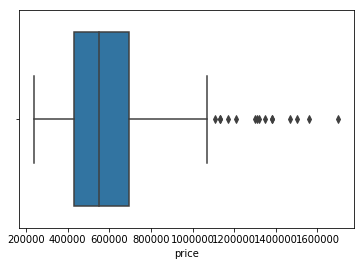

In [128]:
sns.boxplot(x=subset_df['price'])

In [129]:
subset_df.loc[subset_df['price'] > 1100000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
50,2014-06-13,1130000,6,3.75,3010,4360,2,0,3,9,2000,1010.0,2014,1600,5160
135,2015-03-25,1170000,4,3.75,3920,4500,3,0,3,8,3920,0.0,2013,2040,3000
141,2014-07-01,1300000,6,2.75,2630,9420,2,0,5,9,2510,120.0,1900,1540,4969
144,2014-05-12,1320000,4,3.50,3460,3997,2,0,3,10,2560,900.0,2004,1860,4000
168,2015-05-14,1700000,5,3.00,3320,5354,2,0,3,9,3320,0.0,2004,2330,4040
280,2014-07-14,1110000,5,3.25,3070,5000,2,0,3,9,2050,1020.0,2006,2070,5000
287,2014-05-20,1130000,6,3.00,2880,3192,2,0,4,8,2180,700.0,1919,1870,4533
379,2014-11-17,1310000,4,3.75,3490,5625,2,0,3,9,2610,880.0,2014,1940,5000
421,2015-01-28,1350000,4,4.50,3420,7440,3,0,3,9,3420,0.0,2014,1360,5580
441,2015-01-21,1380000,4,3.50,3130,4500,2,0,3,9,2060,1070.0,2014,1500,4500


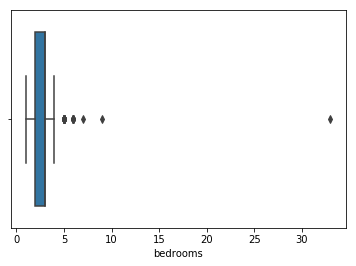

In [130]:
sns.boxplot(x=subset_df['bedrooms'])

In [131]:
subset_df.loc[subset_df['bedrooms'] > 5]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
45,2014-07-10,775000,6,2.75,2980,5000,1,0,3,7,2480,500.0,1916,1470,5000
50,2014-06-13,1130000,6,3.75,3010,4360,2,0,3,9,2000,1010.0,2014,1600,5160
106,2014-05-07,599999,9,4.50,3830,6988,2,0,3,7,2450,1380.0,1938,1460,6291
115,2015-04-14,752000,6,3.75,3810,6663,2,0,4,8,3810,0.0,1977,1610,4561
121,2014-06-26,725000,6,3.00,3110,5000,1,0,5,7,1810,1300.0,1921,1600,4000
141,2014-07-01,1300000,6,2.75,2630,9420,2,0,5,9,2510,120.0,1900,1540,4969
241,2015-04-10,760000,6,3.75,3810,6150,2,0,4,8,3810,0.0,1977,1830,5125
244,2014-05-13,550000,7,4.00,3440,8100,2,0,3,7,3440,0.0,1970,1420,1560
245,2014-12-26,920000,6,3.00,3300,4218,2,0,3,8,2200,1100.0,1970,1420,4218
287,2014-05-20,1130000,6,3.00,2880,3192,2,0,4,8,2180,700.0,1919,1870,4533


In [132]:
subset_df.loc[390, 'bedrooms'] = 3    #df.loc['d', 'score'] = 11.5

In [133]:
subset_df.loc[subset_df['bedrooms'] > 5]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
45,2014-07-10,775000,6,2.75,2980,5000,1,0,3,7,2480,500.0,1916,1470,5000
50,2014-06-13,1130000,6,3.75,3010,4360,2,0,3,9,2000,1010.0,2014,1600,5160
106,2014-05-07,599999,9,4.50,3830,6988,2,0,3,7,2450,1380.0,1938,1460,6291
115,2015-04-14,752000,6,3.75,3810,6663,2,0,4,8,3810,0.0,1977,1610,4561
121,2014-06-26,725000,6,3.00,3110,5000,1,0,5,7,1810,1300.0,1921,1600,4000
141,2014-07-01,1300000,6,2.75,2630,9420,2,0,5,9,2510,120.0,1900,1540,4969
241,2015-04-10,760000,6,3.75,3810,6150,2,0,4,8,3810,0.0,1977,1830,5125
244,2014-05-13,550000,7,4.00,3440,8100,2,0,3,7,3440,0.0,1970,1420,1560
245,2014-12-26,920000,6,3.00,3300,4218,2,0,3,8,2200,1100.0,1970,1420,4218
287,2014-05-20,1130000,6,3.00,2880,3192,2,0,4,8,2180,700.0,1919,1870,4533


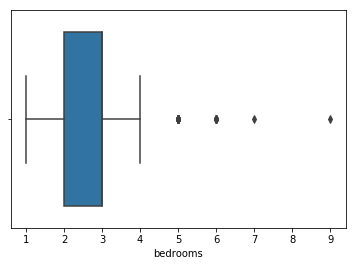

In [134]:
sns.boxplot(x=subset_df['bedrooms'])

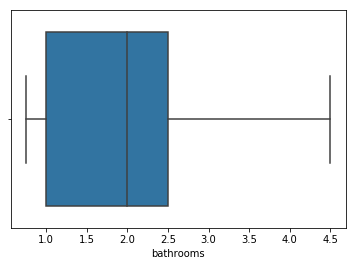

In [53]:
sns.boxplot(x=subset_df['bathrooms'])

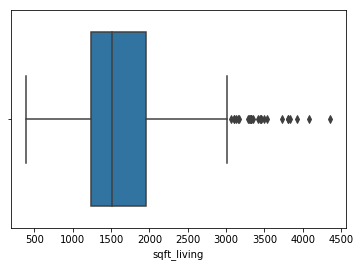

In [57]:
sns.boxplot(x=subset_df['sqft_living'])

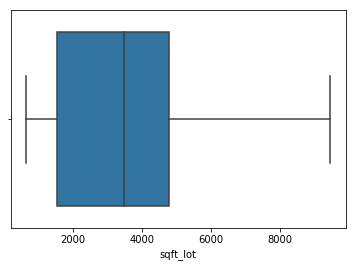

In [58]:
sns.boxplot(x=subset_df['sqft_lot'])

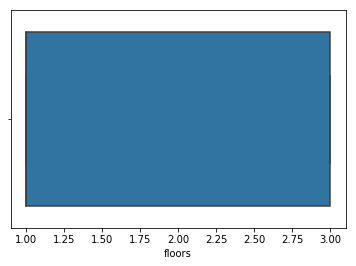

In [59]:
sns.boxplot(x=subset_df['floors'])

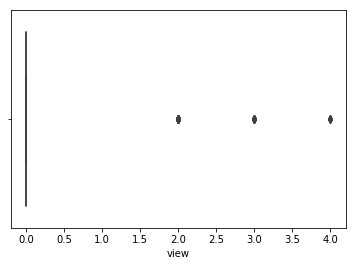

In [60]:
sns.boxplot(x=subset_df['view'])

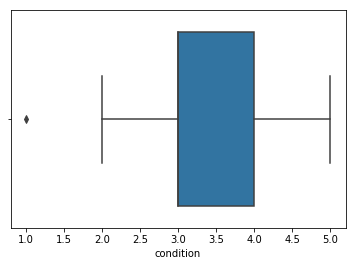

In [61]:
sns.boxplot(x=subset_df['condition'])

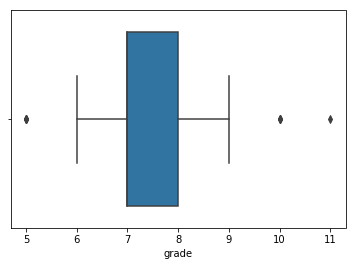

In [62]:
sns.boxplot(x=subset_df['grade'])

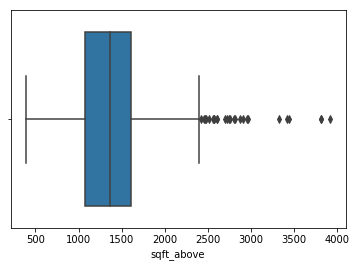

In [63]:
sns.boxplot(x=subset_df['sqft_above'])

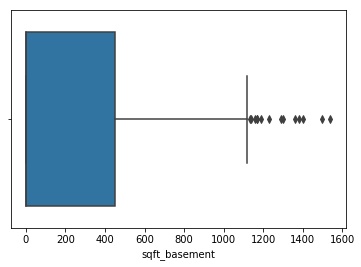

In [64]:
sns.boxplot(x=subset_df['sqft_basement'])

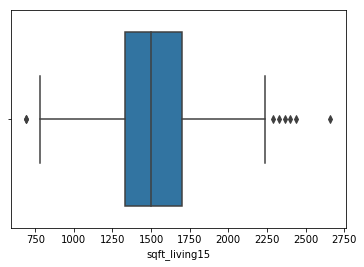

In [65]:
sns.boxplot(x=subset_df['sqft_living15'])

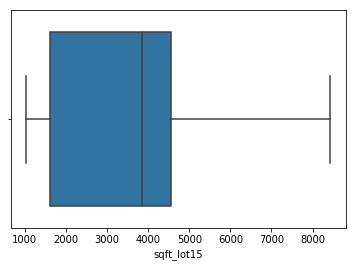

In [66]:
sns.boxplot(x=subset_df['sqft_lot15'])

Checking for Linearity

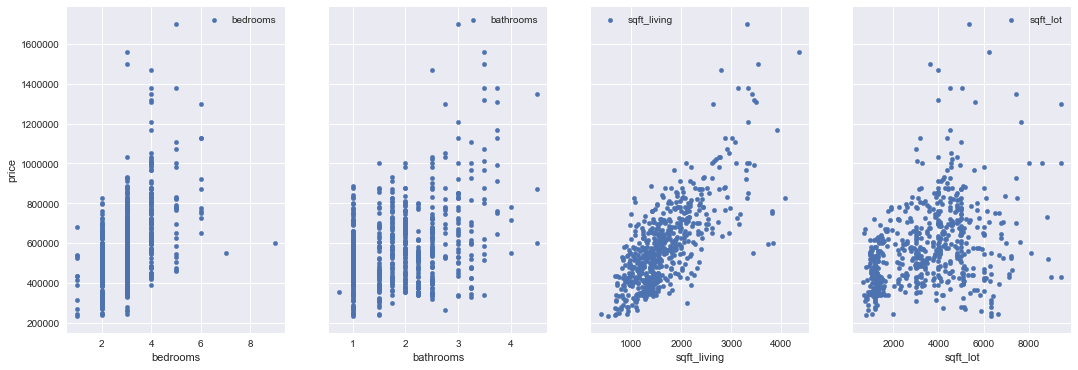

In [169]:
fig, axs = plt.subplots(1, 4, sharey = True, figsize=(18,6))
for idx, channel in enumerate(['bedrooms', 'bathrooms', 'sqft_living','sqft_lot']):
    subset_df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

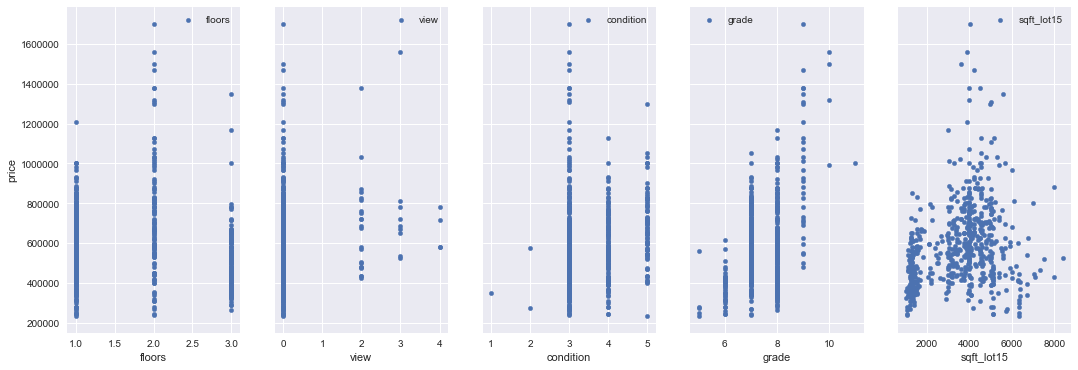

In [175]:
fig, axs = plt.subplots(1, 5, sharey = True, figsize=(18,6))
for idx, channel in enumerate(['floors', 'view', 'condition', 'grade', 'sqft_lot15']):
    subset_df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

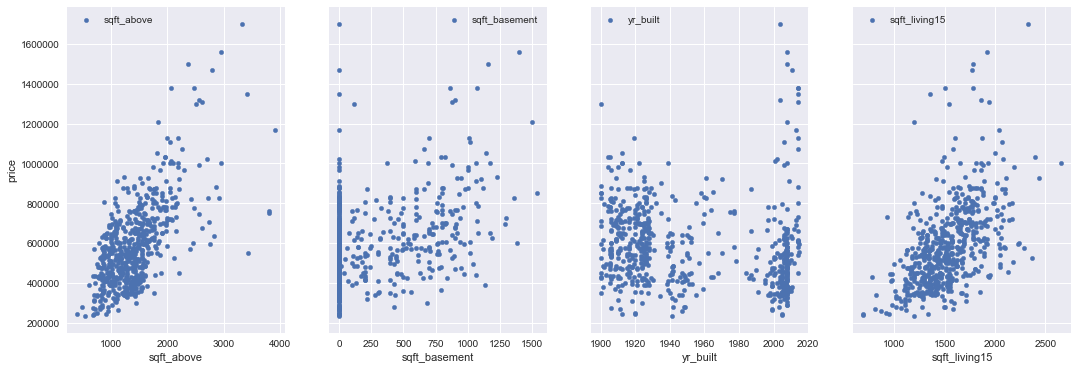

In [171]:
fig, axs = plt.subplots(1, 4, sharey = True, figsize=(18,6))
for idx, channel in enumerate(['sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15']):
    subset_df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

Checking the Distributions of the Predictors for Normality

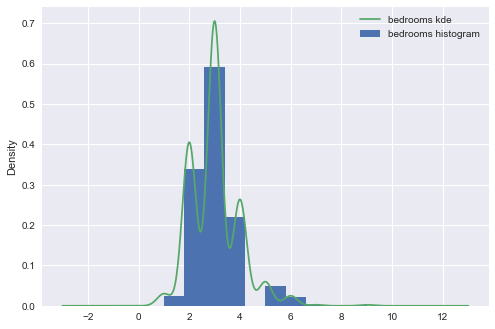

In [154]:
#for column in subset_df:
subset_df['bedrooms'].plot.hist(density= True, label ='bedrooms'+ ' histogram')
subset_df['bedrooms'].plot.kde(label ='bedrooms'+' kde')
plt.legend()
plt.show()

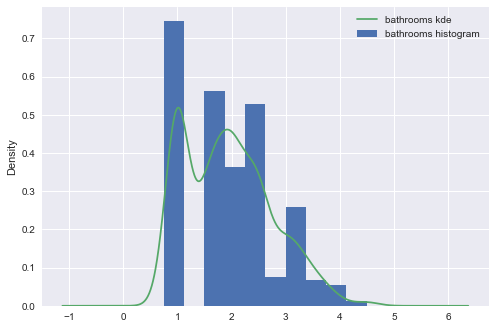

In [155]:
subset_df['bathrooms'].plot.hist(density= True, label ='bathrooms'+ ' histogram')
subset_df['bathrooms'].plot.kde(label ='bathrooms'+' kde')
plt.legend()
plt.show()

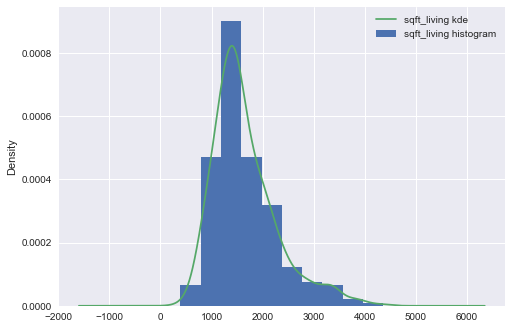

In [156]:
subset_df['sqft_living'].plot.hist(density= True, label ='sqft_living'+ ' histogram')
subset_df['sqft_living'].plot.kde(label ='sqft_living'+' kde')
plt.legend()
plt.show()

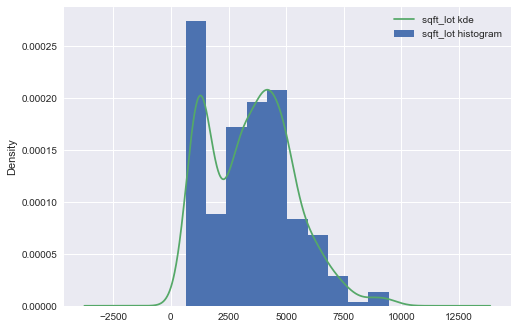

In [157]:
subset_df['sqft_lot'].plot.hist(density= True, label ='sqft_lot'+ ' histogram')
subset_df['sqft_lot'].plot.kde(label ='sqft_lot'+' kde')
plt.legend()
plt.show()

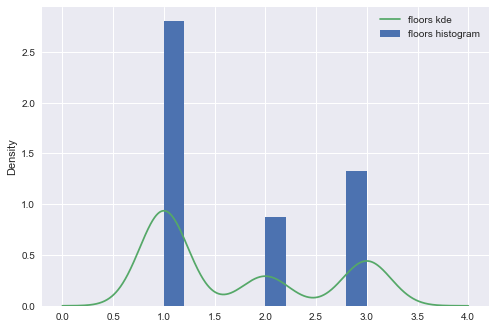

In [158]:
subset_df['floors'].plot.hist(density= True, label ='floors'+ ' histogram')
subset_df['floors'].plot.kde(label ='floors'+' kde')
plt.legend()
plt.show()

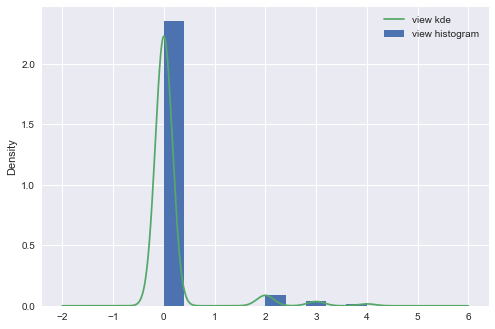

In [159]:
subset_df['view'].plot.hist(density= True, label ='view'+ ' histogram')
subset_df['view'].plot.kde(label ='view'+' kde')
plt.legend()
plt.show()

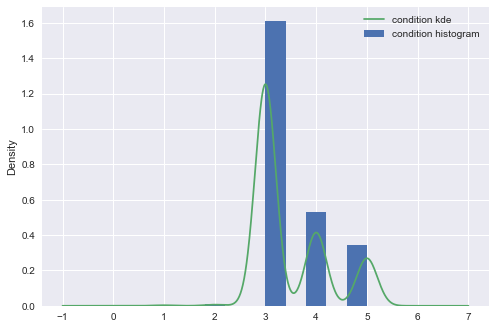

In [160]:
subset_df['condition'].plot.hist(density= True, label ='condition'+ ' histogram')
subset_df['condition'].plot.kde(label ='condition'+' kde')
plt.legend()
plt.show()

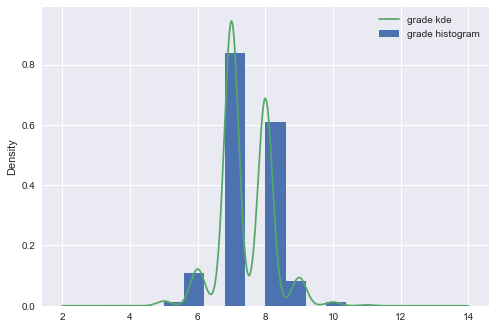

In [161]:
subset_df['grade'].plot.hist(density= True, label ='grade'+ ' histogram')
subset_df['grade'].plot.kde(label ='grade'+' kde')
plt.legend()
plt.show()

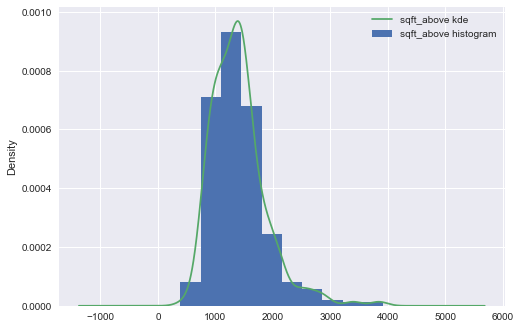

In [162]:
subset_df['sqft_above'].plot.hist(density= True, label ='sqft_above'+ ' histogram')
subset_df['sqft_above'].plot.kde(label ='sqft_above'+' kde')
plt.legend()
plt.show()

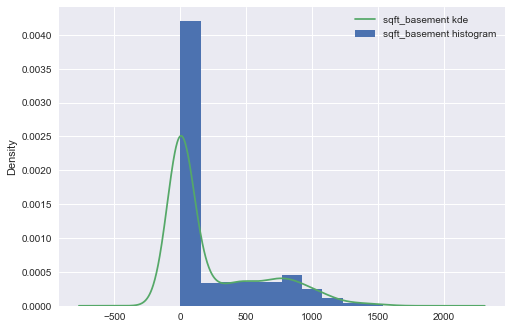

In [163]:
subset_df['sqft_basement'].plot.hist(density= True, label ='sqft_basement'+ ' histogram')
subset_df['sqft_basement'].plot.kde(label ='sqft_basement'+' kde')
plt.legend()
plt.show()

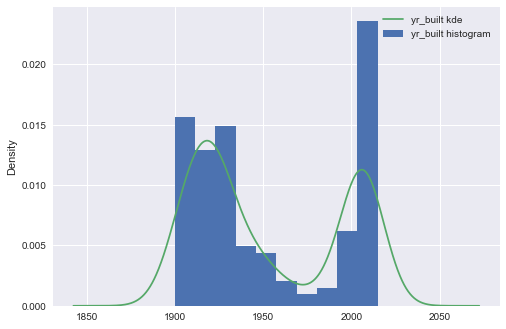

In [164]:
subset_df['yr_built'].plot.hist(density= True, label ='yr_built'+ ' histogram')
subset_df['yr_built'].plot.kde(label ='yr_built'+' kde')
plt.legend()
plt.show()

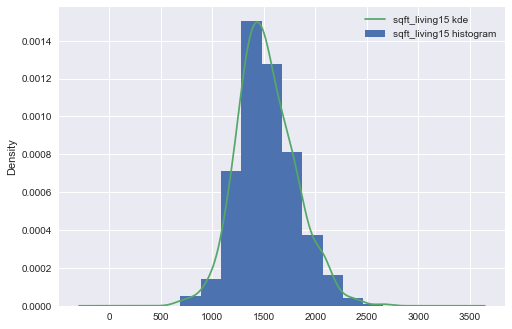

In [165]:
subset_df['sqft_living15'].plot.hist(density= True, label ='sqft_living15'+ ' histogram')
subset_df['sqft_living15'].plot.kde(label ='sqft_living15'+' kde')
plt.legend()
plt.show()

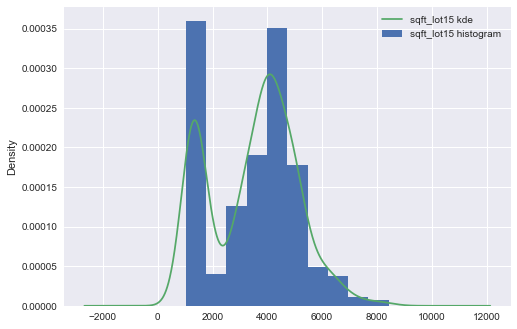

In [166]:
subset_df['sqft_lot15'].plot.hist(density= True, label ='sqft_lot15'+ ' histogram')
subset_df['sqft_lot15'].plot.kde(label ='sqft_lot15'+' kde')
plt.legend()
plt.show()

In [180]:
subset_df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
price,1.000000,0.478321,0.381190,0.739407,0.360072,-0.135420,0.137684,0.187921,0.421607,0.643256,0.423704,-0.140058,0.527521,0.282328
bedrooms,0.478321,1.000000,0.470063,0.712013,0.252258,-0.017999,-0.022913,0.088446,0.236438,0.624890,0.383772,-0.046463,0.285577,0.118515
bathrooms,0.381190,0.470063,1.000000,0.606795,-0.162297,0.500320,0.098186,-0.098595,0.601445,0.570938,0.279162,0.499558,0.133817,-0.237885
sqft_living,0.739407,0.712013,0.606795,1.000000,0.348737,-0.008094,0.086488,0.151051,0.419485,0.815386,0.633174,0.001057,0.422660,0.195485
sqft_lot,0.360072,0.252258,-0.162297,0.348737,1.000000,-0.659327,-0.044804,0.336607,-0.282235,0.190707,0.343236,-0.557300,0.252974,0.794980
floors,-0.135420,-0.017999,0.500320,-0.008094,-0.659327,1.000000,0.079236,-0.397466,0.592364,0.241586,-0.324058,0.828582,-0.169551,-0.665298
view,0.137684,-0.022913,0.098186,0.086488,-0.044804,0.079236,1.000000,0.000074,0.094561,0.109034,0.008127,0.025705,0.166379,-0.047504
condition,0.187921,0.088446,-0.098595,0.151051,0.336607,-0.397466,0.000074,1.000000,-0.240495,-0.032984,0.295466,-0.509934,0.074531,0.283977
grade,0.421607,0.236438,0.601445,0.419485,-0.282235,0.592364,0.094561,-0.240495,1.000000,0.519677,0.042812,0.581752,0.122105,-0.317774
sqft_above,0.643256,0.624890,0.570938,0.815386,0.190707,0.241586,0.109034,-0.032984,0.519677,1.000000,0.081265,0.156365,0.365989,0.046624


In [185]:
housing_df['price'].corr(housing_df['zipcode'])

-0.05340243437772481

In [ ]:
#housing_df = housing_df[np.isfinite(housing_df['view'])]